# Iris Flower Classification
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [138]:
# Data importing and preprocessing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import  train_test_split 
import seaborn as sns 

# Model Training 
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Analysis 
from sklearn.metrics import  confusion_matrix 
from sklearn.metrics import  accuracy_score 
from sklearn.metrics import  precision_score 
from sklearn.metrics import  recall_score

# Model Extraction 
import joblib


In [139]:
data=pd.read_csv("../datasets/Iris.csv")
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


## Data visualization

### Class Distrubution

[]

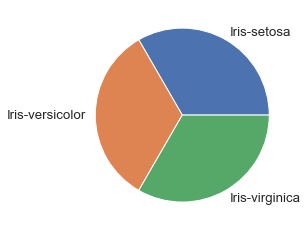

In [140]:
flower_classes=pd.DataFrame(pd.value_counts(data['Species'])).reset_index()
plt.pie(flower_classes['Species'],labels=flower_classes['index'])
plt.plot()



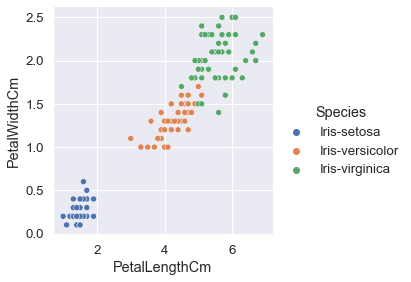

In [141]:
sns.pairplot(data,hue='Species',x_vars='PetalLengthCm',y_vars='PetalWidthCm',height=4)
plt.show()

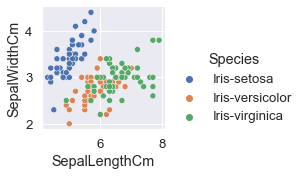

In [142]:
sns.pairplot(data,hue='Species',x_vars='SepalLengthCm',y_vars='SepalWidthCm')
plt.show()

From above two visualization we can clearly conclude that petal-length and petal-width are clearly classify the species and set boundries between them.

### Null Values of Dataset

In [143]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Their is not any Null value of dataset.

### Outlinears of dataset

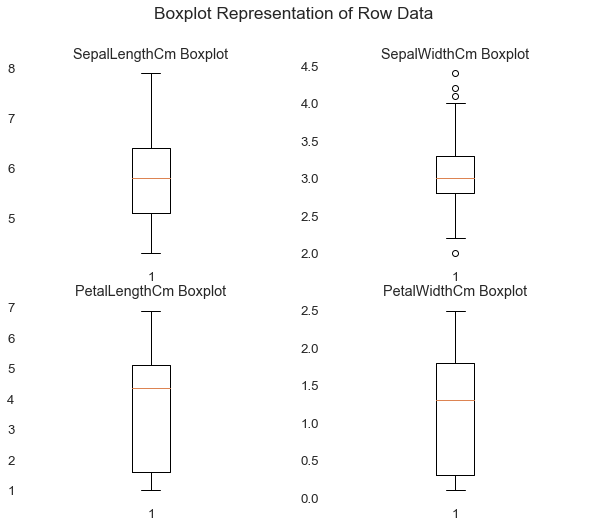

In [144]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in range(len(columns)):
    ax[i//2][int(i%2!=0)].set_facecolor("white")
    ax[i//2][int(i%2!=0)].boxplot(data[columns[i]])
    ax[i//2][int(i%2!=0)].set_title(f"{columns[i]} Boxplot")

plt.suptitle("Boxplot Representation of Row Data")
plt.show()

We can clearly observer that only sepal Width contain outliners as given in above visualization.

In [145]:
Q1=np.percentile(data['SepalWidthCm'],25)
Q3=np.percentile(data['SepalWidthCm'],75)

IRQ=Q3-Q1

lower_bound=Q1-1.5*IRQ
upper_bound=Q3+1.5*IRQ

data=data[(data['SepalWidthCm']>=lower_bound)&(data['SepalWidthCm']<=upper_bound)]

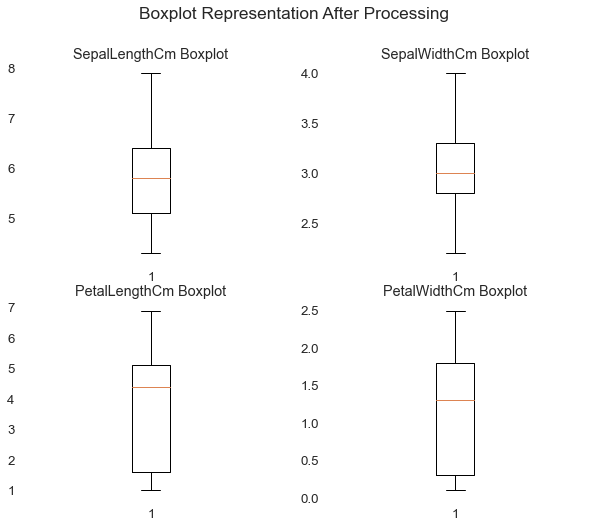

In [146]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in range(len(columns)):
    ax[i//2][int(i%2!=0)].set_facecolor("white")
    ax[i//2][int(i%2!=0)].boxplot(data[columns[i]])
    ax[i//2][int(i%2!=0)].set_title(f"{columns[i]} Boxplot")

plt.suptitle("Boxplot Representation After Processing")
plt.show()

Thus all outliners are removed from the dataset.

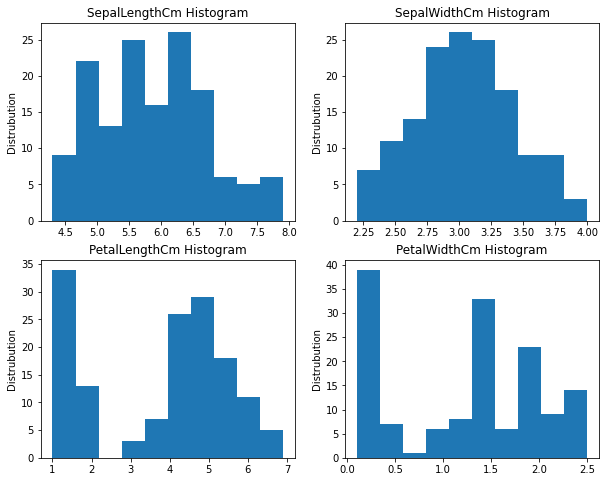

In [10]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

for i in range(len(columns)):
    ax[i//2][int(i%2!=0)].hist(data[columns[i]])
    ax[i//2][int(i%2!=0)].set_title(f"{columns[i]} Histogram")
    ax[i//2][int(i%2!=0)].set_ylabel("Distrubution")
    
plt.show()

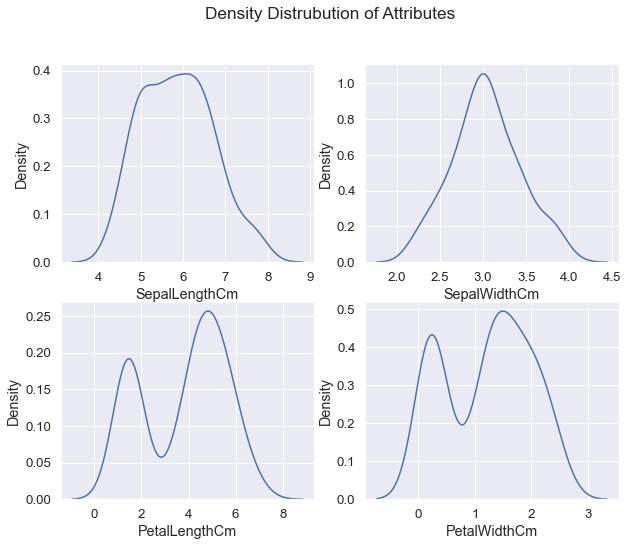

In [118]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,8))

columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in range(len(columns)):
    sns.kdeplot(data[columns[i]],ax=ax[i//2][int(i%2!=0)])

plt.suptitle("Density Distrubution of Attributes")
plt.show()

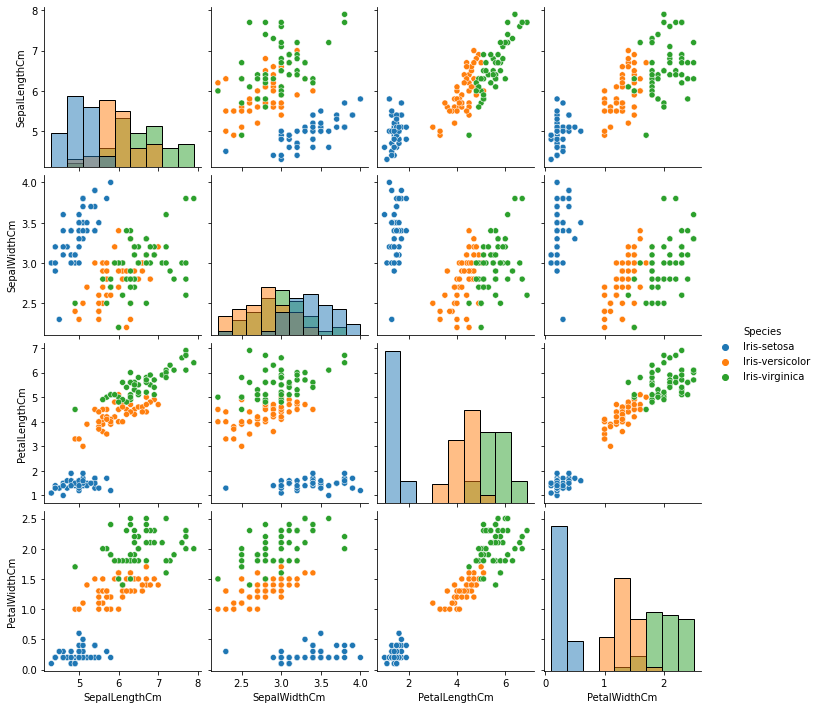

In [14]:
sns.pairplot(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],hue="Species",diag_kind='hist')
plt.show()

### Train Test Split

In [15]:
X=data.drop(columns=['Id','Species']).copy()
Y=data['Species']

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

### Distribution of the Training Classes

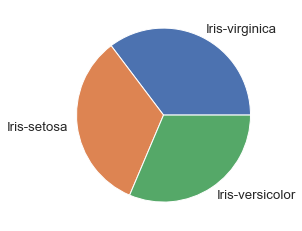

In [117]:
distrubution=pd.value_counts(Y_train)
plt.pie(distrubution,labels=distrubution.index)
plt.show()

As observered all classes are almost equally distrubuted.Hence their is no requirement of resampling of the instances.

## Classification Algorithms

### Logistic Regression

In [72]:
model1=LogisticRegression()

model1.fit(X_train,Y_train)

model1.score(X_train,Y_train)

0.9607843137254902

In [73]:
Y_pred1=model1.predict(X_test)

In [93]:
model1_confusion_matrix=confusion_matrix(Y_test,Y_pred1)
model1_accuracy=accuracy_score(Y_test,Y_pred1)
model1_confusion_matrix

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]], dtype=int64)

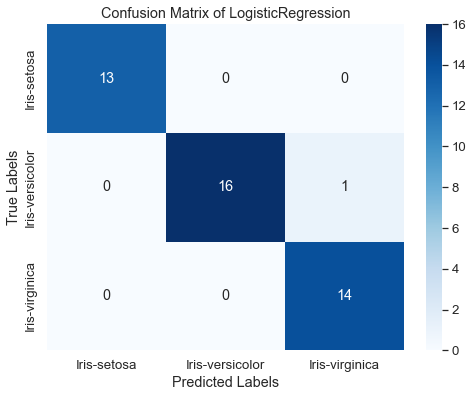

In [75]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
class_labels = np.unique(np.concatenate((Y_test, Y_pred1)))
sns.heatmap(model1_confusion_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

### Decision Tree

In [76]:
model2=DecisionTreeClassifier()

model2.fit(X_train,Y_train)

model2.score(X_train,Y_train)

1.0

In [77]:
Y_pred2=model2.predict(X_test)

In [92]:
model2_confusion_matrix=confusion_matrix(Y_test,Y_pred2)
model2_accuracy=accuracy_score(Y_test,Y_pred2)
model2_confusion_matrix

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 14]], dtype=int64)

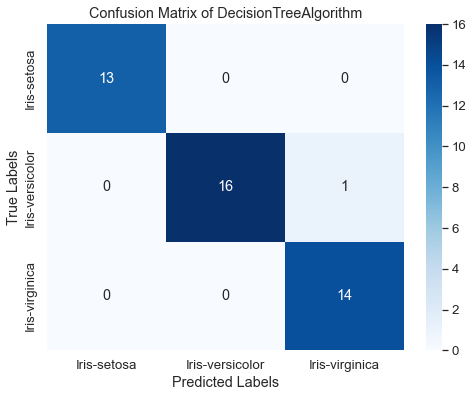

In [79]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
class_labels = np.unique(np.concatenate((Y_test, Y_pred2)))
sns.heatmap(model2_confusion_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of DecisionTreeAlgorithm')
plt.show()

Thus we can observe that decision tree algorithm classify the data accurately.

### Support Vector Machine

In [80]:
model3=SVC()

model3.fit(X_train,Y_train)

model3.score(X_train,Y_train)

0.9607843137254902

In [81]:
Y_pred3=model3.predict(X_test)

In [91]:
model3_confusion_matrix=confusion_matrix(Y_test,Y_pred3)
model3_accuracy=accuracy_score(Y_test,Y_pred3)
model3_confusion_matrix

array([[13,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]], dtype=int64)

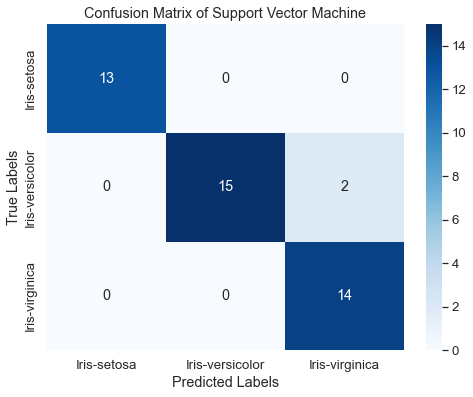

In [83]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
class_labels = np.unique(np.concatenate((Y_test, Y_pred3)))
sns.heatmap(model3_confusion_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()

As shown above confusion metrices also classify the flowers.

### KNN-K nearest neighbors

In [84]:
model4=KNeighborsClassifier(n_neighbors=5)

model4.fit(X_train,Y_train)

KNeighborsClassifier()

In [85]:
Y_pred4=model4.predict(X_test)

In [90]:
model4_confusion_matrix=confusion_matrix(Y_test,Y_pred4)
model4_accuracy=accuracy_score(Y_test,Y_pred4)
model4_confusion_matrix

array([[13,  0,  0],
       [ 0, 15,  2],
       [ 0,  0, 14]], dtype=int64)

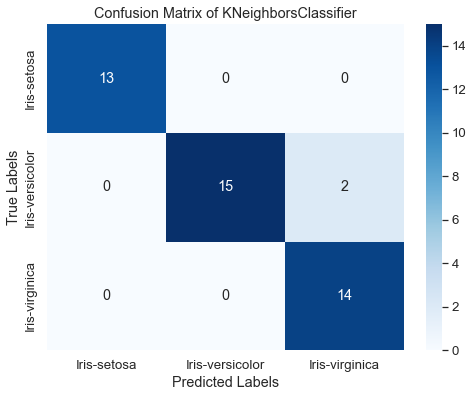

In [87]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
class_labels = np.unique(np.concatenate((Y_test, Y_pred4)))
sns.heatmap(model4_confusion_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of KNeighborsClassifier')
plt.show()

### Model Comparision

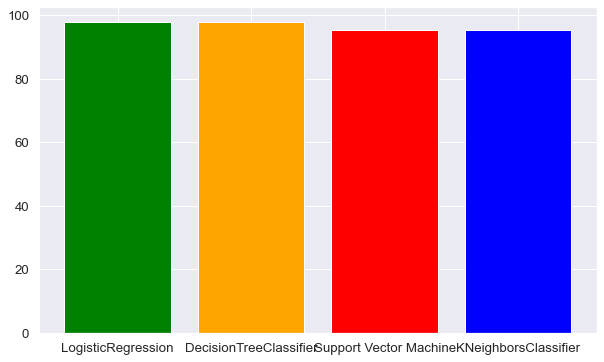

In [108]:
used_models=["LogisticRegression","DecisionTreeClassifier","Support Vector Machine","KNeighborsClassifier"]
accuracies=[model1_accuracy*100,model2_accuracy*100,model3_accuracy*100,model4_accuracy*100]
colors=['green','orange','red','blue']
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(height=accuracies,x=used_models,color=colors)
plt.show()

As observed in above methods all method shows accuracy for prediction.Thus we select decision tree for building model.

### Building model

In [88]:
joblib.dump(model2,"../models/flowerClassification.pkl")

['../models/flowerClassification.pkl']